# Reservas Provadas de Petróleo e Gás Natural

In [21]:
import pandas as pd
df = pd.read_excel('../databases/Dados EPE/Recursos e Reservas Energéticas.xlsx', sheet_name="tabela 6.2")
# deletando metadados da tabela do EPE
df = df.drop(df.head(4).index)
df = df.drop(df.tail(12).index)
df = df.drop(columns=df.columns[0], axis=1)

# trocando o nome das colunas
new_header = df.iloc[0]
new_header.iloc[0] = "ANO"
df = df[1:]
df.columns = new_header

# dropando linhas de valores vazios e renomeando colunas
df = df.dropna()
df = df.rename(columns={
    'PETRÓLEO': 'petróleo_10^3m3',
    'GÁS NATURAL': 'gás_natural_10^6m3'
})
df  =df.reset_index(drop=True)
reservas_petroleo_gas = df

# Recursos Hidráulicos

In [22]:
df = pd.read_excel('../databases/Dados EPE/Recursos e Reservas Energéticas.xlsx', sheet_name="tabela 6.3")

# deletando metadados das tabelas da EPE
df = df.drop(df.head(5).index)
df = df.drop(df.tail(1).index)
df = df.drop(columns=df.columns[0], axis=1,)

# renomando colunas
new_header = df.iloc[0]
new_header.iloc[0] = "ANO"
df = df[1:]
df.columns = new_header

# removendo linhas vazias e renomeando colunas
df = df.rename(columns = {
    'INVENTARIADO + APROVEITADO / INVENTORIED': "inventariado_mw",
    'ESTIMADO / ESTIMATED\n': "estimado_mw",
    'TOTAL': 'total_mw'
})
df = df.reset_index(drop=True)
df = df.dropna()
recursos_hidraulicos = df

# Reservas de Carvão Mineral

In [23]:
df = pd.read_excel('../databases/Dados EPE/Recursos e Reservas Energéticas.xlsx', sheet_name="tabela 6.4")

# removendo metadados das colunas do EPE
df = df.drop(columns=df.columns[0], axis=1)
df = df.drop(df.head(5).index)

# trocando o nome das colunas
new_header = df.iloc[0]
new_header.iloc[0] = "ANO"
df = df[1:]
df.columns = new_header

# dropando metadados remanescentes
df.drop(df.head(1).index)
# dropando linhas vazios
df = df.dropna()
df = df.reset_index(drop=True)
reservas_carvao_mineral = df


# Reservas de Urânio

In [24]:
df = pd.read_excel('../databases/Dados EPE/Recursos e Reservas Energéticas.xlsx', sheet_name="tabela 6.5")
# dropando metadados das tabelas do EPE
df = df.drop(df.head(6).index)
df = df.drop(columns=df.columns[0])

# trocando o nome das colunas
new_header = df.iloc[0]
df = df[1:]
new_header.iloc[0] = "ANO"
df.columns = new_header

# dropando colunas vazias e renomeando colunas
df = df.dropna()
df = df.reset_index(drop=True)
df.rename(columns = {
    'U3O8': "ton_U3O8"
})
reservas_de_uranio = df

# Recursos e Reservas energéticas brasileiras

In [25]:
from string import digits
df = pd.read_excel('../databases/Dados EPE/Recursos e Reservas Energéticas.xlsx', sheet_name="Tabela 6.1")
# dropando metadados das tabelas do EPE
df = df.drop(df.head(3).index)
df = df.dropna(how='all', axis=0)
df = df.reset_index(drop=True)
# trocando nome das colunas
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

# removendo mais metadados do EPE
df = df.drop(index=df.index[6:23])
df = df.drop(df.head(2).index)
df = df.iloc[:, :-2]

# dropando as colunas vazias
df = df.dropna()
df = df.set_axis(['energia', 'unidade_de_medida', 'medidas', 'inferidas', 'total', 'equivalência'], axis=1)

# consertando a formatação dos textos da coluna 'energia'
df['energia'] = df['energia'].apply(lambda x: x.translate(str.maketrans('', '', digits)))
df = df.reset_index(drop=True)
recursos_reservas_energeticas_br = df


In [26]:
dict_recursos_reservas = {
    'RESERVAS_PROVADAS_DE_PETROLEO_E_GAS_NATURAL': reservas_petroleo_gas,
    'RECURSOS_HIDRAULICOS': recursos_hidraulicos,
    'RESERVAS_DE_CARVÃO_MINERAL': reservas_carvao_mineral,
    'RESERVAS_DE_URANIO': reservas_de_uranio,
    'RECURSOS_E_RESERVAS_ENERGÉTICAS_BRASILEIRAS': recursos_reservas_energeticas_br
}

In [27]:
dfs = [dict_recursos_reservas['RESERVAS_DE_CARVÃO_MINERAL'], dict_recursos_reservas['RECURSOS_HIDRAULICOS'],
       dict_recursos_reservas['RESERVAS_PROVADAS_DE_PETROLEO_E_GAS_NATURAL'], dict_recursos_reservas['RESERVAS_DE_URANIO']
       ]

df = dfs[0]
# unindo os dataframes com base no ano
for next_df in dfs[1:]:
    df = df.merge(next_df, on='ANO', how='outer')  

In [28]:
df = df.rename(columns={
    'ANO': 'ano',
    'ENERGÉTICO':'carvão_energético',
    'METALÚRGICO': 'carvão_metalúrgico',
    'TOTAL': 'carvão_total',
    'PEAT': 'peat',
    'inventariado_mw': 'hidraulico_inventariado_mw',
    'estimado_mw': 'hidraulico_estimado_mw',
    'total_mw': 'hidraulico_total_mw',
    'petróleo_10^3m3': 'petróleo',
    'gás_natural_10^6m3': 'gás_natural',
    'U3O8': 'uranio_u3o8'
})

In [29]:
# alterando os tipos das colunas
df = df.infer_objects()
# preencher valores NaN com uma relação linear entre as variáveis (veremos mais pra frente)
df = df.interpolate(method="linear", limit_direction="both")

Introduzindo novas colunas que revelam as mudanças percentuais de acordo com cada ano para cada reserva, permitindo uma melhor compreensão da variação ao longo do tempo.

In [30]:
colunas_reservas = ['petróleo', 'gás_natural', 'carvão_total', 'gás_natural', 'uranio_u3o8', 'hidraulico_total_mw']

# calculando os percentuais
for col in colunas_reservas:
    df[f'{col}_mudança_perct'] = df[col].pct_change() * 100

df['hidraulico_total_mw_mudança_perct'] = df['hidraulico_total_mw'].pct_change() * 100
# preenchendo com zero os valores do ano 1970, já que não existem anos anteriores nos dados
df_recursos = df.fillna(0)

In [31]:
%run ../Limpezas/limpeza_oferta_demanda.ipynb

Preparando as tabelas de Oferta e Demanda para interseção, informações sobre consumo, produção e importação serão utilizadas e agregadas aos dados finais para futuro comparativo entre reservas/produção, reservas/consumo, etc.

In [32]:
df1 = dict_oferta_demanda['Petróleo'].rename(columns={'PRODUÇÃO 1': 'PRODUÇÃO', 'IMPORTAÇÃO 2': 'IMPORTAÇÃO'})
df2 = dict_oferta_demanda['Energia_Hidráulica']
df3 = dict_oferta_demanda['Gás_Natural']
df4 = dict_oferta_demanda['Urânio']
df5 = dict_oferta_demanda['Carvão_Metalúrgico']

df_pet =  df1[['ANO', 'CONSUMO TOTAL', 'PRODUÇÃO', 'IMPORTAÇÃO']]
df_hidr = df2[['ANO', 'CONSUMO TOTAL', 'PRODUÇÃO']]
df_gas = df3[['ANO', 'CONSUMO TOTAL', 'PRODUÇÃO', 'IMPORTAÇÃO']]
df_uran = df4[['ANO', 'CONSUMO TOTAL', 'PRODUÇÃO', 'IMPORTAÇÃO']]
df_carv = df5[['ANO', 'CONSUMO TOTAL', 'PRODUÇÃO', 'IMPORTAÇÃO']]

def normalizar_colunas(df):
    return df.columns.str.lower().str.replace(' ', '_')

# pega todas as colunas, exceto o ano, adiciona o sufixo e retorna a lista de todas as colunas alteradas
def adicionar_sufixo(df: pd.DataFrame, suffix):
    colunas_a_renomear = df.columns[df.columns != 'ano']
    renomeadas =  colunas_a_renomear.map(lambda x: x + suffix)
    return ['ano'] + renomeadas.tolist()

dfs = [df_pet, df_hidr, df_gas, df_uran, df_carv]
for df in dfs:
    df.columns = normalizar_colunas(df)


df_pet.columns = adicionar_sufixo(df_pet, '_petróleo')
df_hidr.columns = adicionar_sufixo(df_hidr, '_hidraulica')
df_gas.columns = adicionar_sufixo(df_gas, '_gas_natural')
df_uran.columns = adicionar_sufixo(df_uran, '_uranio_u3o8')
df_carv.columns = adicionar_sufixo(df_carv, '_carvão_met')


Juntando as informações

In [33]:
df_merge = pd.merge(df_pet, df_hidr, how='outer', on='ano')
df_merge = pd.merge(df_merge, df_gas, how='outer', on='ano')
df_merge = pd.merge(df_merge, df_uran, how='outer', on='ano')
df_merge = pd.merge(df_merge, df_carv, how='outer', on='ano')

df = pd.merge(df_recursos, df_merge, on='ano', how='outer')

df

,ano,carvão_energético,carvão_metalúrgico,carvão_total,peat,hidraulico_inventariado_mw,hidraulico_estimado_mw,hidraulico_total_mw,petróleo,gás_natural,...,produção_hidraulica,consumo_total_gas_natural,produção_gas_natural,importação_gas_natural,consumo_total_uranio_u3o8,produção_uranio_u3o8,importação_uranio_u3o8,consumo_total_carvão_met,produção_carvão_met,importação_carvão_met
0,1970,4423.000000,660.000,5083.000000,12.0,36977.0000,42370.0000,79347.0000,1.207300e+05,25936.000000,...,39801.0,127,1264,0,0,0,0,2475,785,1965
1,1971,4423.000000,660.000,5083.000000,12.0,36977.0000,42370.0000,79347.0000,1.207300e+05,25936.000000,...,43199.0,175,1178,0,0,0,0,2522,830,1672
2,1972,4423.000000,660.000,5083.000000,12.0,36977.0000,42370.0000,79347.0000,1.207300e+05,25936.000000,...,50681.0,233,1241,0,0,0,0,2503,837,1857
3,1973,4423.000000,660.000,5083.000000,12.0,36977.0000,42370.0000,79347.0000,1.207300e+05,25936.000000,...,57890.0,255,1180,0,0,0,0,2597,825,1780
4,1974,4423.000000,660.000,5083.000000,12.0,36977.0000,42370.0000,79347.0000,1.207300e+05,25936.000000,...,65679.0,448,1488,0,0,0,0,2579,1137,1745
5,1975,11348.000000,746.000,12094.000000,12.0,36977.0000,42370.0000,79347.0000,1.207300e+05,25936.000000,...,72287.0,490,1625,0,0,0,0,3114,869,2793
6,1976,11362.000000,746.000,12108.000000,12.0,36977.0000,42370.0000,79347.0000,1.359000e+05,34135.000000,...,82913,551,1642,0,0,0,0,3973,1002,2964
7,1977,19786.000000,1105.000,20891.000000,12.0,36977.0000,42370.0000,79347.0000,1.739400e+05,39455.000000,...,93480,674,1808,0,0,0,0,4717,1199,3824
8,1978,19842.000000,1406.000,21248.000000,12.0,36977.0000,42370.0000,79347.0000,1.789700e+05,44389.000000,...,102746,863,1933,0,0,0,0,4764,1317,3547
9,1979,21290.000000,1483.000,22773.000000,51.0,36977.0000,42370.0000,79347.0000,1.984200e+05,45082.000000,...,116580,933,1899,0,0,0,0,5470,1438,4253


In [34]:
#Salvando num .feather por ser mais rápido e mais leve que .csv ou .xlsx
df.to_feather('../databases/recursos.feather')

<Axes: >

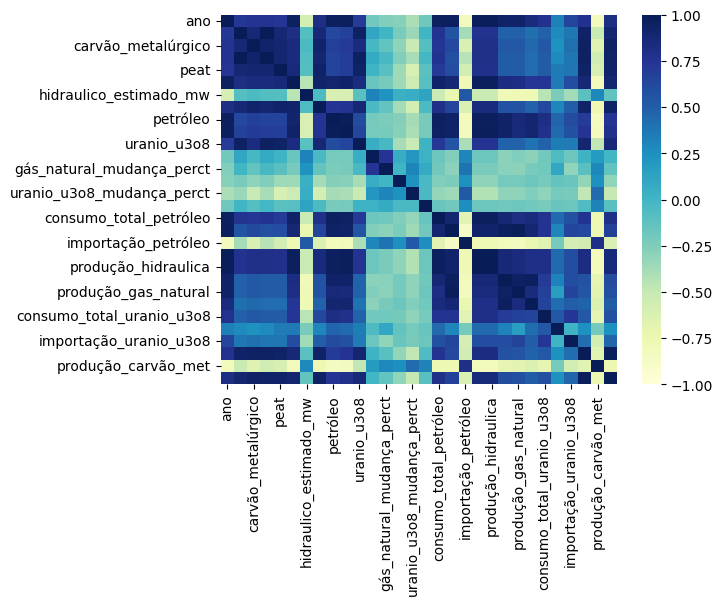

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(), vmax=1, vmin=-1, cmap="YlGnBu")